In [2]:
import pandas as pd

In [4]:
pd.read_csv("datasets/tweet dataset.csv")

,Unnamed: 0,target,ids,date,flag,user,text
0,734779,0,2264631528,Sun Jun 21 04:28:40 PDT 2009,NO_QUERY,andychong9,dad having fever again.. not looking too good
1,632647,0,2232741622,Thu Jun 18 20:19:48 PDT 2009,NO_QUERY,SLeepdepD,@judahgabriel i wish i had that much to say
2,337706,0,2014269923,Wed Jun 03 00:59:10 PDT 2009,NO_QUERY,BlackCat_Saya,@rohan_01 you know..it's really sad that u kno...
3,465228,0,2175302784,Mon Jun 15 00:36:56 PDT 2009,NO_QUERY,sawarahh,@cathicks i don't get it.
4,1280419,4,2001635016,Tue Jun 02 01:32:44 PDT 2009,NO_QUERY,essieruth,@dougsky i will have a look when i get home!
...,...,...,...,...,...,...,...
95,1338972,4,2018419297,Wed Jun 03 09:56:19 PDT 2009,NO_QUERY,kreativlink,@plainbananas italian ice cream? ohhhh.... wan...
96,1532048,4,2178167599,Mon Jun 15 07:17:46 PDT 2009,NO_QUERY,alyssasilcox,@babiibecca yeah idk im supposed to go back to...
97,1020485,4,1882384445,Fri May 22 06:46:30 PDT 2009,NO_QUERY,paulbeebe,#followfriday @ryanhurst @disklabs - both comp...
98,820937,4,1553893253,Sat Apr 18 15:30:02 PDT 2009,NO_QUERY,ciberesfera,@undertheground


c:\Users\abhay\OneDrive\Desktop\AT\MS(R)\CNN\.conda\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 309ms/step - accuracy: 0.1771 - loss: 1.6077 - val_accuracy: 0.4375 - val_loss: 1.5938
Epoch 2/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6875 - loss: 1.5852 - val_accuracy: 0.5000 - val_loss: 1.5720
Epoch 3/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8438 - loss: 1.5575 - val_accuracy: 0.6250 - val_loss: 1.5434
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Accuracy: 0.55


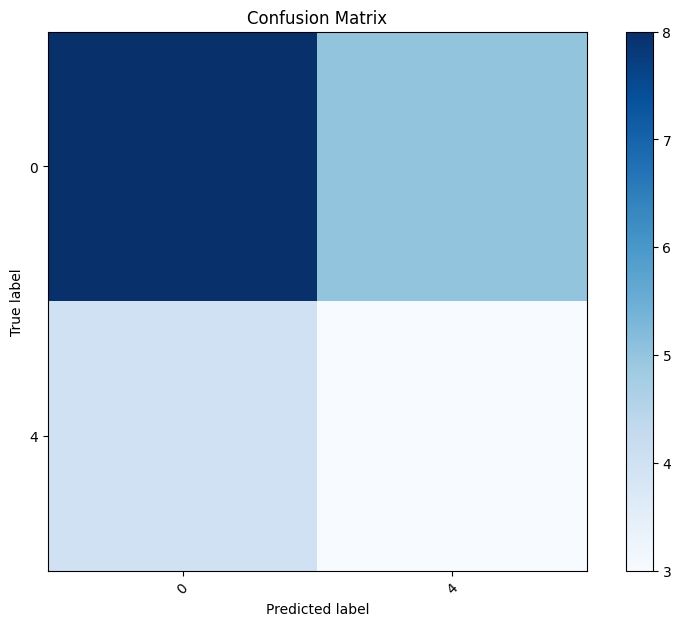

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical

# Sample data loading (Make sure to replace this with your actual file path and columns)
data = pd.read_csv('datasets/tweet dataset.csv')
texts = data['text']  # Replace 'text_column_name' with the name of your text column
targets = data['target']  # Replace 'target_column_name' with the name of your target column

# Text preprocessing
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
x = pad_sequences(sequences, maxlen=100)  # maxlen depends on text length distribution

# Convert labels to categorical
y = to_categorical(targets)

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model building
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=100))
model.add(LSTM(50))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Model training
model.fit(x_train, y_train, epochs=3, batch_size=32, validation_split=0.2)

# Evaluation
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Accuracy: {accuracy}')

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(targets)))
plt.xticks(tick_marks, np.unique(targets), rotation=45)
plt.yticks(tick_marks, np.unique(targets))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
